**Imports**

In [1]:
import numpy as np
import pydataset
import matplotlib.pyplot as plt #For saving images
import pyplotterlib.standard.plotters as ppl

**Import and process example data**

In [2]:
DF = pydataset.data(item="Puromycin")

#Get raw data
_treatedFrame = DF.loc[DF["state"]=="treated"]
_unTreatedFrame = DF.loc[DF["state"]=="untreated"]

plotDataRaw = [_treatedFrame[["conc","rate"]].to_numpy(), _unTreatedFrame[["conc","rate"]].to_numpy()]

#Get data with duplicate concs averaged
_treatedMean = _treatedFrame.groupby("conc").mean()
_unTreatedMean = _unTreatedFrame.groupby("conc").mean()
_treatedMean, _unTreatedMean = _treatedMean.reset_index(), _unTreatedMean.reset_index()

averagedPlotData = [ _treatedMean[["conc","rate"]], _unTreatedMean[["conc","rate"]]  ]


**1 ) Create a plot + plotter showing the data**

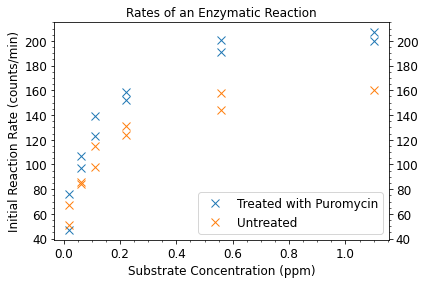

In [3]:

plotterKwargs = {"dataLabels":["Treated with Puromycin", "Untreated"],
                 "fontSizeDefault":12,
                 "lineMarkerSizes":8,
                 "lineMarkerStyles":['x'],
                 "lineStyles":["None"],
                 "plotData":plotDataRaw,
                 "showLegend":True,
                 "showTicksAndLabelsOnSides.right":True,
                 "showMinorTickMarkersX":True,
                 "showMinorTickMarkersY":True,
                 "titleStr":"Rates of an Enzymatic Reaction",
                 "xLabelStr":"Substrate Concentration (ppm)",
                 "yLabelStr":"Initial Reaction Rate (counts/min)"}

templPlotter = ppl.LinePlotter(**plotterKwargs)
plotterOutput = templPlotter.createPlot()
plt.savefig("linePlotterA_imgA")

**2) Create a second plot where we just plot the averages**

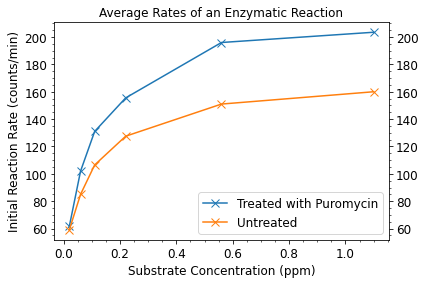

In [4]:

overrideKwargs = {"lineStyles":["-"],
                  "plotData":averagedPlotData,
                  "titleStr":"Average Rates of an Enzymatic Reaction"}
secondPlotOutput = templPlotter.createPlot(**overrideKwargs)
plt.savefig("linePlotterA_imgB")


**3) Make a plot showing raw and Averaged data**

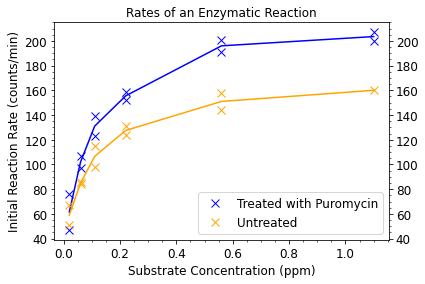

In [5]:
currPlotData = [plotDataRaw[0], averagedPlotData[0], plotDataRaw[1], averagedPlotData[1]]

overrides = {"dataLabels":["Treated with Puromycin", None, "Untreated", None],
             "lineColors":['b','b','orange','orange'],
             "lineMarkerStyles":['x','None'],
             'lineStyles':['None','-'],
             "plotData":currPlotData
            }
currPlotOutput = templPlotter.createPlot(**overrides)
plt.savefig("linePlotterA_imgC")

In [6]:
templPlotter.optionNames

['axisBorderMakeInvisible',
 'axisColorX',
 'axisColorX_exclSpines',
 'axisColorY',
 'axisColorY_exclSpines',
 'dataLabels',
 'figSizeOnCreation',
 'fontSizeDefault',
 'legendFractPosStart',
 'legendLocStr',
 'legendNumbCols',
 'lineColors',
 'lineMarkerSizes',
 'lineMarkerStyles',
 'lineStyles',
 'plotData',
 'showLegend',
 'showMinorTickMarkersX',
 'showMinorTickMarkersY',
 'showTicksAndLabelsOnSides',
 'tickMarkerLabelsX',
 'tickMarkerLabelsY',
 'tickMarkerValsX',
 'tickMarkerValsY',
 'titleFractPosX',
 'titleFractPosY',
 'titleStr',
 'xLabelFractPos',
 'xLabelStr',
 'xLimit',
 'yLabelFractPos',
 'yLabelStr',
 'yLimit']